In [4]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.getOrCreate()

In [5]:
# Importing data which has a header. Schema is automatically configured.
df = spark.read.csv('master.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
df.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

In [6]:
# But what about data type?
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [7]:
# Display the columns
df.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [8]:
df.describe(['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop']).show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+
|summary|   country|              year|   sex|        age|       suicides_no|        population| suicides/100k pop|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|
| stddev|      null| 8.469055024441408|  null|       null| 902.0479168336403|3911779.4417563565| 18.96151101450326|
|    min|   Albania|              1985|female|15-24 years|                 0|               278|               0.0|
|    max|Uzbekistan|              2016|  male|  75+ years|             22338|          43805214|            224.97|
+-------+----------+------------------+------+-----------+--------------

In [9]:
 df.describe(['country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']).show()

+-------+--------------+-------------------+------------------+------------------+----------+
|summary|  country-year|       HDI for year| gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+--------------+-------------------+------------------+------------------+----------+
|  count|         27820|               8364|             27820|             27820|     27820|
|   mean|          null| 0.7766011477761785|              null|16866.464414090584|      null|
| stddev|          null|0.09336670859029984|              null|18887.576472205576|      null|
|    min|   Albania1987|              0.483| 1,002,219,052,968|               251|   Boomers|
|    max|Uzbekistan2014|              0.944|       997,007,926|            126352|    Silent|
+-------+--------------+-------------------+------------------+------------------+----------+



In [10]:
data = df.toPandas()

In [11]:
data_1 = data.copy()
for index_label, row_series in data_1.iterrows():
    data_1.at[index_label , ' gdp_for_year ($) '] = row_series[' gdp_for_year ($) '].replace(',','')

data_1[' gdp_for_year ($) '] = pd.to_numeric(data_1[' gdp_for_year ($) '])

In [12]:
coding_schema = ['country', 'year', 'sex', 'age', 'country-year', 'generation']
for code in coding_schema:
    print(data[code].astype('category'))

0           Albania
1           Albania
2           Albania
3           Albania
4           Albania
            ...    
27815    Uzbekistan
27816    Uzbekistan
27817    Uzbekistan
27818    Uzbekistan
27819    Uzbekistan
Name: country, Length: 27820, dtype: category
Categories (101, object): ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', ..., 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan']
0        1987
1        1987
2        1987
3        1987
4        1987
         ... 
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
Name: year, Length: 27820, dtype: category
Categories (32, int64): [1985, 1986, 1987, 1988, ..., 2013, 2014, 2015, 2016]
0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): ['female', 'male']
0        15-24 years
1        35-54 years
2     

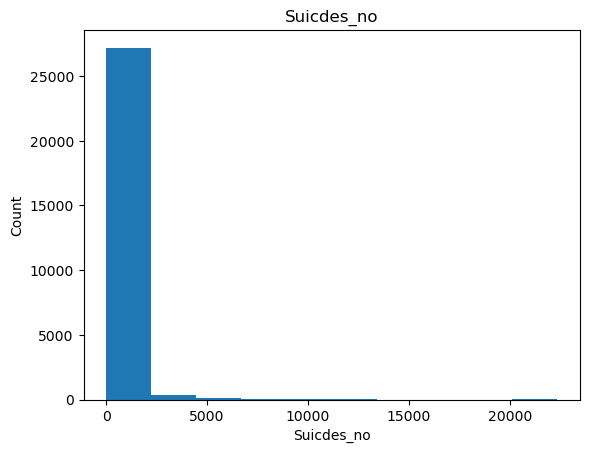

In [13]:
import matplotlib.pyplot as plt

#Section 2.3
plt.hist(data['suicides_no'])
plt.title("Suicdes_no")
plt.xlabel("Suicdes_no")
plt.ylabel("Count")
plt.show()

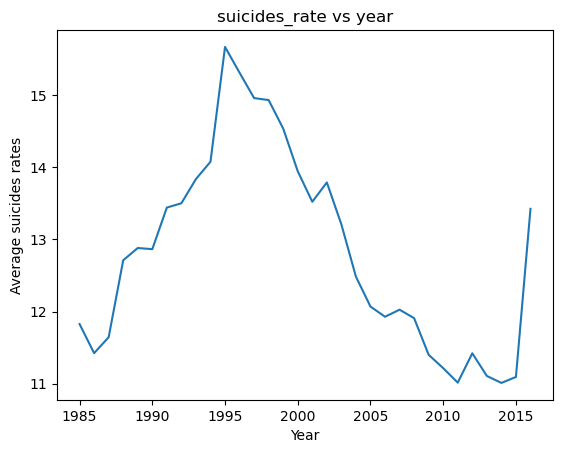

In [14]:
plot_dt = data.groupby("year")['suicides/100k pop'].mean().reset_index()
plt.plot(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs year")
plt.xlabel("Year")
plt.ylabel("Average suicides rates")
plt.show()

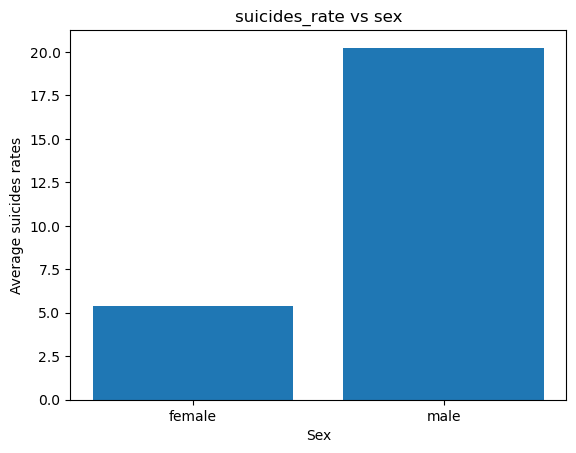

In [15]:
plot_dt = data.groupby("sex")['suicides/100k pop'].mean().reset_index()
plt.bar(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs sex")
plt.xlabel("Sex")
plt.ylabel("Average suicides rates")
plt.show()

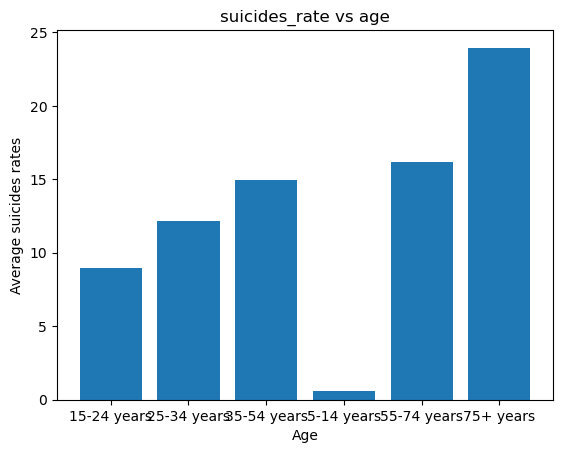

In [16]:
plot_dt = data.groupby("age")['suicides/100k pop'].mean().reset_index()
plt.bar(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs age")
plt.xlabel("Age")
plt.ylabel("Average suicides rates")
plt.show()

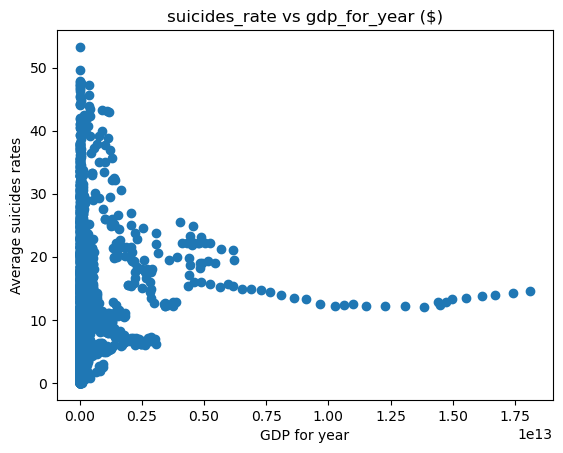

In [17]:
plot_dt = data_1.groupby(" gdp_for_year ($) ")['suicides/100k pop'].mean().reset_index().sort_values(by=[' gdp_for_year ($) '])
plt.scatter(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs gdp_for_year ($)")
plt.xlabel("GDP for year")
plt.ylabel("Average suicides rates")
plt.show()

In [18]:
from pyspark.sql import functions as f
def find_outliers(df):

    # Identifying the numerical columns in a spark dataframe
    numeric_columns = [column[0] for column in df.dtypes if column[1]=='int']

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        df = df.withColumn(isOutlierCol,f.when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]

    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',sum(df[column] for column in selected_columns))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df

In [19]:
outliers = find_outliers(df)
outliers = outliers.filter(outliers['total_Outliers']>=1)
outliers.show()

+---------+----+------+-----------+-----------+----------+-----------------+-------------+------------+------------------+------------------+---------------+--------------+
|  country|year|   sex|        age|suicides_no|population|suicides/100k pop| country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|total_outliers|
+---------+----+------+-----------+-----------+----------+-----------------+-------------+------------+------------------+------------------+---------------+--------------+
|Argentina|1985|  male|55-74 years|        485|   1997000|            24.29|Argentina1985|       0.694|    88,416,668,900|              3264|G.I. Generation|             1|
|Argentina|1985|  male|35-54 years|        414|   3346300|            12.37|Argentina1985|       0.694|    88,416,668,900|              3264|         Silent|             1|
|Argentina|1986|  male|55-74 years|        530|   2008300|            26.39|Argentina1986|        null|   110,934,442,763|             

In [20]:
outliers.describe(['total_Outliers']).show()

+-------+-------------------+
|summary|     total_Outliers|
+-------+-------------------+
|  count|               6570|
|   mean| 1.3858447488584476|
| stddev|0.49304549413325166|
|    min|                  1|
|    max|                  3|
+-------+-------------------+



In [21]:
df_2 = df.drop('suicides_no', 'country-year' , 'population')
df_2.columns

['country',
 'year',
 'sex',
 'age',
 'suicides/100k pop',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [22]:
df_2 = df_2.na.drop()
df_2.describe().show()

+-------+----------+------------------+------+-----------+------------------+-------------------+------------------+------------------+----------+
|summary|   country|              year|   sex|        age| suicides/100k pop|       HDI for year| gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+----------+------------------+------+-----------+------------------+-------------------+------------------+------------------+----------+
|  count|      8364|              8364|  8364|       8364|              8364|               8364|              8364|              8364|      8364|
|   mean|      null|2005.3486370157818|  null|       null| 11.99193567670969| 0.7766011477761785|              null|21074.371592539454|      null|
| stddev|      null| 8.803020461915075|  null|       null|17.361772356853592|0.09336670859029984|              null|22579.186967673137|      null|
|    min|   Albania|              1985|female|15-24 years|               0.0|              0.483| 1,057,801,282,051|  

In [23]:
df_3=spark.createDataFrame(data_1) 
df_3.head()

Row(country='Albania', year=1987, sex='male', age='15-24 years', suicides_no=21, population=312900, suicides/100k pop=6.71, country-year='Albania1987', HDI for year=nan,  gdp_for_year ($) =2156624900, gdp_per_capita ($)=796, generation='Generation X')

In [24]:
df_3 = df_3.drop('suicides_no', 'country-year' , 'population', 'HDI for year')
df_3.columns

['country',
 'year',
 'sex',
 'age',
 'suicides/100k pop',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [25]:
df_3.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : long (nullable = true)
 |-- gdp_per_capita ($): long (nullable = true)
 |-- generation: string (nullable = true)



In [26]:
from pyspark.sql.types import DoubleType
df_4 = df_3.withColumn(" gdp_for_year ($) ", df_3[" gdp_for_year ($) "].cast(DoubleType()))
df_4 = df_4.withColumn("gdp_per_capita ($)", df_3["gdp_per_capita ($)"].cast(DoubleType()))
df_4.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : double (nullable = true)
 |-- gdp_per_capita ($): double (nullable = true)
 |-- generation: string (nullable = true)



In [27]:
df_4.show()

+-------+----+------+-----------+-----------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides/100k pop| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|             6.71|       2.1566249E9|             796.0|   Generation X|
|Albania|1987|  male|35-54 years|             5.19|       2.1566249E9|             796.0|         Silent|
|Albania|1987|female|15-24 years|             4.83|       2.1566249E9|             796.0|   Generation X|
|Albania|1987|  male|  75+ years|             4.59|       2.1566249E9|             796.0|G.I. Generation|
|Albania|1987|  male|25-34 years|             3.28|       2.1566249E9|             796.0|        Boomers|
|Albania|1987|female|  75+ years|             2.81|       2.1566249E9|             796.0|G.I. Generation|
|Albania|1987|female|35-54 years|             

In [28]:
df_4.describe().show()

+-------+----------+------------------+------+-----------+------------------+--------------------+------------------+----------+
|summary|   country|              year|   sex|        age| suicides/100k pop|   gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+----------+------------------+------+-----------+------------------+--------------------+------------------+----------+
|  count|     27820|             27820| 27820|      27820|             27820|               27820|             27820|     27820|
|   mean|      null|2001.2583752695903|  null|       null|12.816097411933871|4.455809690257266E11|16866.464414090584|      null|
| stddev|      null|  8.46905502444134|  null|       null|18.961511014503188|1.453609985940912E12| 18887.57647220557|      null|
|    min|   Albania|              1985|female|15-24 years|               0.0|         4.6919625E7|             251.0|   Boomers|
|    max|Uzbekistan|              2016|  male|  75+ years|            224.97|        1.8120714E13

In [29]:
from pyspark.sql import functions as F
df_5 = df_4.withColumn(
    'suicides_risk',
    F.when(F.col('suicides/100k pop') > 14, 'high')\
    .when(F.col('suicides/100k pop') < 5, 'low')\
    .otherwise('medium')
)
df_5.show()

+-------+----+------+-----------+-----------------+------------------+------------------+---------------+-------------+
|country|year|   sex|        age|suicides/100k pop| gdp_for_year ($) |gdp_per_capita ($)|     generation|suicides_risk|
+-------+----+------+-----------+-----------------+------------------+------------------+---------------+-------------+
|Albania|1987|  male|15-24 years|             6.71|       2.1566249E9|             796.0|   Generation X|       medium|
|Albania|1987|  male|35-54 years|             5.19|       2.1566249E9|             796.0|         Silent|       medium|
|Albania|1987|female|15-24 years|             4.83|       2.1566249E9|             796.0|   Generation X|          low|
|Albania|1987|  male|  75+ years|             4.59|       2.1566249E9|             796.0|G.I. Generation|          low|
|Albania|1987|  male|25-34 years|             3.28|       2.1566249E9|             796.0|        Boomers|          low|
|Albania|1987|female|  75+ years|       

In [30]:
df_5 = df_5.withColumn(
    'developed_country',
    F.when(F.col('gdp_per_capita ($)') < 25000, 'undeveloped')\
    .otherwise('developed')
)
df_5.show()

+-------+----+------+-----------+-----------------+------------------+------------------+---------------+-------------+-----------------+
|country|year|   sex|        age|suicides/100k pop| gdp_for_year ($) |gdp_per_capita ($)|     generation|suicides_risk|developed_country|
+-------+----+------+-----------+-----------------+------------------+------------------+---------------+-------------+-----------------+
|Albania|1987|  male|15-24 years|             6.71|       2.1566249E9|             796.0|   Generation X|       medium|      undeveloped|
|Albania|1987|  male|35-54 years|             5.19|       2.1566249E9|             796.0|         Silent|       medium|      undeveloped|
|Albania|1987|female|15-24 years|             4.83|       2.1566249E9|             796.0|   Generation X|          low|      undeveloped|
|Albania|1987|  male|  75+ years|             4.59|       2.1566249E9|             796.0|G.I. Generation|          low|      undeveloped|
|Albania|1987|  male|25-34 years| 

In [31]:
df_5.printSchema() 

root
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : double (nullable = true)
 |-- gdp_per_capita ($): double (nullable = true)
 |-- generation: string (nullable = true)
 |-- suicides_risk: string (nullable = false)
 |-- developed_country: string (nullable = false)



In [32]:
df_5 = df_5.withColumnRenamed(" gdp_for_year ($) ","gdp_yearly")
df_5 = df_5.withColumnRenamed("suicides/100k pop","suicides_rate")
df_5 = df_5.withColumnRenamed("gdp_per_capita ($)","gdp_per_capita")
df_5.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_rate: double (nullable = true)
 |-- gdp_yearly: double (nullable = true)
 |-- gdp_per_capita: double (nullable = true)
 |-- generation: string (nullable = true)
 |-- suicides_risk: string (nullable = false)
 |-- developed_country: string (nullable = false)



In [33]:
# Demonstration of data integration - Preparation
data_a = data.iloc[:, :6]
data_b = data.iloc[:, -6:]
data_a.to_csv("data_a.csv")
data_b.to_csv("data_b.csv")

In [34]:
df_a = pd.read_csv("data_a.csv")
df_b = pd.read_csv("data_b.csv")

In [35]:
merged = df_a.merge(df_b)
ps_merged = spark.createDataFrame(merged)
ps_merged.columns

['Unnamed: 0',
 'country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [36]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
sex_indexed = sex_indexer.fit(df_5).transform(df_5)

year_indexer = StringIndexer(inputCol='year',outputCol='yearIndex')
year_indexed = year_indexer.fit(sex_indexed).transform(sex_indexed)

country_indexer = StringIndexer(inputCol='country',outputCol='countryIndex')
country_indexed = country_indexer.fit(year_indexed).transform(year_indexed)

age_indexer = StringIndexer(inputCol='age',outputCol='ageIndex')
age_indexed = age_indexer.fit(country_indexed).transform(country_indexed )

generation_indexer = StringIndexer(inputCol='generation',outputCol='generationIndex')
generation_indexed = generation_indexer.fit(age_indexed).transform(age_indexed)

developed_indexer = StringIndexer(inputCol='developed_country',outputCol='developedIndex')
developed_indexed = developed_indexer.fit(generation_indexed).transform(generation_indexed)

risk_indexer = StringIndexer(inputCol='suicides_risk',outputCol='riskIndex')
risk_indexed = risk_indexer.fit(developed_indexed).transform(developed_indexed)


In [37]:
risk_indexed.show()

+-------+----+------+-----------+-------------+-----------+--------------+---------------+-------------+-----------------+--------+---------+------------+--------+---------------+--------------+---------+
|country|year|   sex|        age|suicides_rate| gdp_yearly|gdp_per_capita|     generation|suicides_risk|developed_country|sexIndex|yearIndex|countryIndex|ageIndex|generationIndex|developedIndex|riskIndex|
+-------+----+------+-----------+-------------+-----------+--------------+---------------+-------------+-----------------+--------+---------+------------+--------+---------------+--------------+---------+
|Albania|1987|  male|15-24 years|         6.71|2.1566249E9|         796.0|   Generation X|       medium|      undeveloped|     1.0|     26.0|        63.0|     0.0|            0.0|           0.0|      2.0|
|Albania|1987|  male|35-54 years|         5.19|2.1566249E9|         796.0|         Silent|       medium|      undeveloped|     1.0|     26.0|        63.0|     2.0|            1.0| 

In [38]:
reducted = risk_indexed.drop('suicides_rate')
reducted.columns

['country',
 'year',
 'sex',
 'age',
 'gdp_yearly',
 'gdp_per_capita',
 'generation',
 'suicides_risk',
 'developed_country',
 'sexIndex',
 'yearIndex',
 'countryIndex',
 'ageIndex',
 'generationIndex',
 'developedIndex',
 'riskIndex']

In [39]:
# Now we can assemble all of this as one vector in the features column. 
assembler = VectorAssembler(inputCols=[
 'countryIndex',
 'yearIndex',
 'sexIndex',
 'gdp_yearly',
 'gdp_per_capita',
 'ageIndex',
 'generationIndex',
 'developedIndex'],outputCol='features')
output = assembler.transform(risk_indexed)

In [40]:
final_df = output.select('features', 'riskIndex')
final_df.show()

+--------------------+---------+
|            features|riskIndex|
+--------------------+---------+
|[63.0,26.0,1.0,2....|      2.0|
|[63.0,26.0,1.0,2....|      2.0|
|(8,[0,1,3,4],[63....|      0.0|
|[63.0,26.0,1.0,2....|      0.0|
|[63.0,26.0,1.0,2....|      0.0|
|[63.0,26.0,0.0,2....|      0.0|
|[63.0,26.0,0.0,2....|      0.0|
|[63.0,26.0,0.0,2....|      0.0|
|[63.0,26.0,1.0,2....|      0.0|
|[63.0,26.0,0.0,2....|      0.0|
|[63.0,26.0,0.0,2....|      0.0|
|[63.0,26.0,1.0,2....|      0.0|
|[63.0,28.0,0.0,2....|      2.0|
|[63.0,28.0,1.0,2....|      2.0|
|[63.0,28.0,1.0,2....|      0.0|
|[63.0,28.0,1.0,2....|      0.0|
|[63.0,28.0,1.0,2....|      0.0|
|(8,[0,1,3,4],[63....|      0.0|
|[63.0,28.0,0.0,2....|      0.0|
|[63.0,28.0,0.0,2....|      0.0|
+--------------------+---------+
only showing top 20 rows



In [41]:
from pyspark.ml.feature import UnivariateFeatureSelector

selector = UnivariateFeatureSelector(outputCol="selectedFeatures")
selector.setFeatureType("continuous").setLabelType("categorical").setSelectionMode("numTopFeatures").setSelectionThreshold(5).setFeaturesCol("features").setLabelCol("riskIndex").setOutputCol("selectedFeatures")

result = selector.fit(final_df).transform(final_df)
result.show()

+--------------------+---------+--------------------+
|            features|riskIndex|    selectedFeatures|
+--------------------+---------+--------------------+
|[63.0,26.0,1.0,2....|      2.0|[63.0,1.0,2.15662...|
|[63.0,26.0,1.0,2....|      2.0|[63.0,1.0,2.15662...|
|(8,[0,1,3,4],[63....|      0.0|(5,[0,2,3],[63.0,...|
|[63.0,26.0,1.0,2....|      0.0|[63.0,1.0,2.15662...|
|[63.0,26.0,1.0,2....|      0.0|[63.0,1.0,2.15662...|
|[63.0,26.0,0.0,2....|      0.0|[63.0,0.0,2.15662...|
|[63.0,26.0,0.0,2....|      0.0|[63.0,0.0,2.15662...|
|[63.0,26.0,0.0,2....|      0.0|[63.0,0.0,2.15662...|
|[63.0,26.0,1.0,2....|      0.0|[63.0,1.0,2.15662...|
|[63.0,26.0,0.0,2....|      0.0|[63.0,0.0,2.15662...|
|[63.0,26.0,0.0,2....|      0.0|[63.0,0.0,2.15662...|
|[63.0,26.0,1.0,2....|      0.0|[63.0,1.0,2.15662...|
|[63.0,28.0,0.0,2....|      2.0|[63.0,0.0,2.126E9...|
|[63.0,28.0,1.0,2....|      2.0|[63.0,1.0,2.126E9...|
|[63.0,28.0,1.0,2....|      0.0|[63.0,1.0,2.126E9...|
|[63.0,28.0,1.0,2....|      

In [42]:
result.select('selectedFeatures').show(truncate=False, n=1)

+--------------------------------+
|selectedFeatures                |
+--------------------------------+
|[63.0,1.0,2.1566249E9,796.0,0.0]|
+--------------------------------+
only showing top 1 row



In [43]:
df_transformed = risk_indexed.drop('country',
 'year',
 'sex',
 'age',
 'generation',
 'suicides_risk',
 'suicides_rate',                                 
 'developed_country',
 'yearIndex',
 'generationIndex',
 'developedIndex')

In [44]:
df_transformed.show()

+-----------+--------------+--------+------------+--------+---------+
| gdp_yearly|gdp_per_capita|sexIndex|countryIndex|ageIndex|riskIndex|
+-----------+--------------+--------+------------+--------+---------+
|2.1566249E9|         796.0|     1.0|        63.0|     0.0|      2.0|
|2.1566249E9|         796.0|     1.0|        63.0|     2.0|      2.0|
|2.1566249E9|         796.0|     0.0|        63.0|     0.0|      0.0|
|2.1566249E9|         796.0|     1.0|        63.0|     4.0|      0.0|
|2.1566249E9|         796.0|     1.0|        63.0|     1.0|      0.0|
|2.1566249E9|         796.0|     0.0|        63.0|     4.0|      0.0|
|2.1566249E9|         796.0|     0.0|        63.0|     2.0|      0.0|
|2.1566249E9|         796.0|     0.0|        63.0|     1.0|      0.0|
|2.1566249E9|         796.0|     1.0|        63.0|     3.0|      0.0|
|2.1566249E9|         796.0|     0.0|        63.0|     5.0|      0.0|
|2.1566249E9|         796.0|     0.0|        63.0|     3.0|      0.0|
|2.1566249E9|       

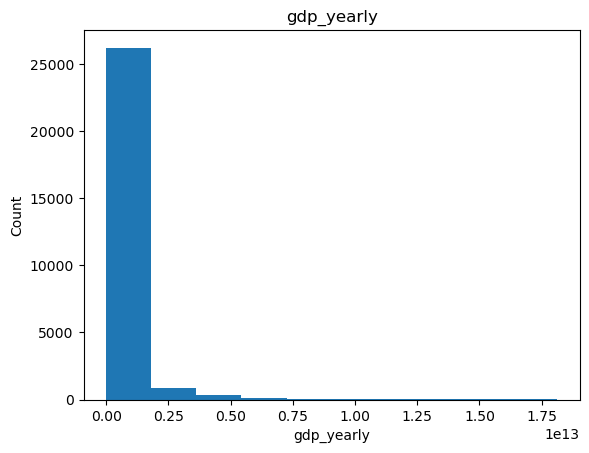

In [45]:
import matplotlib.pyplot as plt

#Section 2.3
plt.hist(data_1[' gdp_for_year ($) '])
plt.title("gdp_yearly")
plt.xlabel("gdp_yearly")
plt.ylabel("Count")
plt.show()

In [46]:
from pyspark.ml.feature import MinMaxScaler
# Now we can assemble all of this as one vector in the features column. 
assembler = VectorAssembler(inputCols=[
 'countryIndex',
 'sexIndex',
 'gdp_yearly',
 'gdp_per_capita',
 'ageIndex'],outputCol='features')

transformed = assembler.transform(risk_indexed)

scaler = MinMaxScaler(inputCol="features",\
         outputCol="scaledFeatures")
scalerModel =  scaler.fit(transformed)
scaledData = scalerModel.transform(transformed)

In [47]:
scaledData.select('features', 'scaledFeatures').show(truncate=False)

+--------------------------------+------------------------------------------------------------------------+
|features                        |scaledFeatures                                                          |
+--------------------------------+------------------------------------------------------------------------+
|[63.0,1.0,2.1566249E9,796.0,0.0]|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |
|[63.0,1.0,2.1566249E9,796.0,2.0]|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.4]               |
|[63.0,0.0,2.1566249E9,796.0,0.0]|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |
|[63.0,1.0,2.1566249E9,796.0,4.0]|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |
|[63.0,1.0,2.1566249E9,796.0,1.0]|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.2]               |
|[63.0,0.0,2.1566249E9,796.0,4.0]|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |
|[63.0,0.0,2.1566249E9,796.0

In [48]:
projected_data = scaledData.select('scaledFeatures', 'riskIndex')
projected_data.show(truncate=False)

+------------------------------------------------------------------------+---------+
|scaledFeatures                                                          |riskIndex|
+------------------------------------------------------------------------+---------+
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |2.0      |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.4]               |2.0      |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |0.0      |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |0.0      |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.2]               |0.0      |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |0.0      |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.4]               |0.0      |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.2]               |0.0      |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.600000000

In [49]:
df_transformed.drop('riskIndex').show(n=1)

+-----------+--------------+--------+------------+--------+
| gdp_yearly|gdp_per_capita|sexIndex|countryIndex|ageIndex|
+-----------+--------------+--------+------------+--------+
|2.1566249E9|         796.0|     1.0|        63.0|     0.0|
+-----------+--------------+--------+------------+--------+
only showing top 1 row



In [50]:
from pyspark.ml.feature import UnivariateFeatureSelector

selector = UnivariateFeatureSelector(outputCol="selectedFeatures")
selector.setFeatureType("continuous").setLabelType("categorical").setSelectionMode("numTopFeatures").setSelectionThreshold(5).setFeaturesCol("scaledFeatures").setLabelCol("riskIndex").setOutputCol("selectedFeatures")

result = selector.fit(projected_data).transform(projected_data)
result.select('selectedFeatures').show(truncate=False)

+------------------------------------------------------------------------+
|selectedFeatures                                                        |
+------------------------------------------------------------------------+
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.4]               |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.0]               |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.2]               |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.8]               |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.4]               |
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,0.2]               |
|[0.63,1.0,1.1642536478609265E-4,0.004321932419251235,0.6000000000000001]|
|[0.63,0.0,1.1642536478609265E-4,0.004321932419251235,1.0]               |
|[0.63,0.0,1.164253647860

In [51]:
df_transformed.drop('riskIndex').columns
code_dict = {}
input_columns=['countryIndex','sexIndex', 'gdp_yearly', 'gdp_per_capita','ageIndex']
for i in range(len(input_columns)):
    code_dict[i] = input_columns[i]
code_dict

{0: 'countryIndex',
 1: 'sexIndex',
 2: 'gdp_yearly',
 3: 'gdp_per_capita',
 4: 'ageIndex'}

In [52]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(labelCol="riskIndex", featuresCol="scaledFeatures",maxBins=120)

rfc_model = rfc.fit(projected_data)
rfc_model.featureImportances

SparseVector(5, {0: 0.1096, 1: 0.3543, 2: 0.0869, 3: 0.0133, 4: 0.4358})

In [53]:
# Now we can assemble all of this as one vector in the features column. 
assembler = VectorAssembler(inputCols=[
 'countryIndex',
 'sexIndex',
 'gdp_yearly',
 'gdp_per_capita',
 'ageIndex'],outputCol='features')
output = assembler.transform(risk_indexed)

In [54]:
final_df = output.select('features', 'riskIndex')
final_df.show(n=1, truncate=False)

+--------------------------------+---------+
|features                        |riskIndex|
+--------------------------------+---------+
|[63.0,1.0,2.1566249E9,796.0,0.0]|2.0      |
+--------------------------------+---------+
only showing top 1 row



In [55]:
print((final_df.count(), len(final_df.columns)))
# Displays (4, 2)

(27820, 2)


In [56]:
train_data, test_data = final_df.randomSplit([0.7,0.3])

In [57]:
print((train_data.count(), len(train_data.columns)))
print((test_data.count(), len(test_data.columns)))

(19613, 2)
(8207, 2)


In [58]:
train_data.select('features').show(n=1, truncate=False)

+----------------------------------+
|features                          |
+----------------------------------+
|(5,[2,3],[6.9386774475E10,9759.0])|
+----------------------------------+
only showing top 1 row



In [59]:
from pyspark.ml.classification import LogisticRegression

# Note that survived is a categorial variable but didn't require any transformation.
# That's because it's already in the format of 1's and 0's. 
lg = LogisticRegression(featuresCol='features',labelCol='riskIndex', maxIter=150, regParam=0.3, elasticNetParam=0.8)
lg_model = lg.fit(train_data)

In [60]:
from pyspark.ml.classification import DecisionTreeClassifier

dtc = DecisionTreeClassifier(featuresCol='features',labelCol='riskIndex', maxBins=120, maxDepth=20,impurity='gini')
# Train the models 
dtc_model = dtc.fit(train_data)
dtc_model.featureImportances

SparseVector(5, {0: 0.3816, 1: 0.1347, 2: 0.1437, 3: 0.1073, 4: 0.2327})

In [61]:
# Let's start off with multi classification.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Transform test data.
lg_predictions = lg_model.transform(test_data)
dtc_predictions = dtc_model.transform(test_data)

# Evaluate the model using the multi classifer
my_eval = MulticlassClassificationEvaluator(labelCol = 'riskIndex', predictionCol="prediction", metricName="accuracy")

lg_acc = my_eval.evaluate(lg_predictions)
dtc_acc = my_eval.evaluate(dtc_predictions)

# This is the area under the curve. This indicates that the data is highly seperable.
print("Multinomial Logistic Regression")
print('Accuracy of: {0:2.2f}%'.format(lg_acc*100))
print("Decision Tree Classfier:")
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

Multinomial Logistic Regression
Accuracy of: 47.61%
Decision Tree Classfier:
A single decision tree has an accuracy of: 85.32%


In [62]:
lg_predictions.show()

+--------------------+---------+--------------------+--------------------+----------+
|            features|riskIndex|       rawPrediction|         probability|prediction|
+--------------------+---------+--------------------+--------------------+----------+
|(5,[2,3],[2.12790...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|(5,[2,3],[2.61695...|      2.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|(5,[2,3],[3.00904...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|(5,[2,3],[3.35998...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|(5,[2,3],[3.88691...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|(5,[2,3],[4.09425...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|[0.0,0.0,6.938677...|      1.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|[0.0,0.0,9.903616...|      0.0|[0.35278473174621...|[0.45806301088558...|       0.0|
|[0.0,0.0,1.241684...|      2.0|[0.35278473174621...|[

In [63]:
print(dtc_model.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_be34298e08b9, depth=20, numNodes=4905, numClasses=3, numFeatures=5
  If (feature 4 in {0.0,1.0,2.0,3.0,4.0})
   If (feature 1 in {0.0})
    If (feature 0 in {6.0,8.0,10.0,16.0,17.0,25.0,27.0,35.0,41.0,42.0,43.0,51.0,55.0,56.0,57.0,58.0,62.0,65.0,70.0,76.0,78.0,79.0,80.0,81.0,82.0,83.0,88.0,90.0,92.0,93.0,94.0,95.0,98.0})
     If (feature 0 in {6.0,10.0,16.0,17.0,25.0,27.0,42.0,51.0,55.0,56.0,62.0,70.0,76.0,79.0,80.0,81.0,82.0,83.0,88.0,90.0,92.0,93.0,94.0,95.0,98.0})
      If (feature 0 in {6.0,10.0,16.0,25.0,27.0,42.0,51.0,55.0,76.0,79.0,81.0,83.0,90.0,92.0,93.0,94.0,95.0,98.0})
       If (feature 0 in {6.0,16.0,27.0,42.0,76.0,79.0,81.0,90.0,92.0,93.0,94.0,95.0,98.0})
        Predict: 0.0
       Else (feature 0 not in {6.0,16.0,27.0,42.0,76.0,79.0,81.0,90.0,92.0,93.0,94.0,95.0,98.0})
        If (feature 2 <= 5.76599861335E10)
         If (feature 2 <= 5.20204481945E10)
          If (feature 3 <= 18812.0)
           If (featur

In [64]:
def parse(lines):
    block = []
    while lines :

        if lines[0].startswith('If'):
            bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
            block.append({'name':bl, 'children':parse(lines)})


            if lines[0].startswith('Else'):
                be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
                block.append({'name':be, 'children':parse(lines)})
        elif not lines[0].startswith(('If','Else')):
            block2 = lines.pop(0)
            block.append({'name':block2})
        else:
            break	
    return block

# Convert Tree to JSON
def tree_json(tree):
    data = []
    for line in tree.splitlines() : 
        if line.strip():
            line = line.strip()
            data.append(line)
        else : break
        if not line : break
    json = {'name':'Root', 'children':parse(data[1:])}
    return json


In [65]:
tree_json(dtc_model.toDebugString)

{'name': 'Root',
 'children': [{'name': 'feature 4 in {0.0,1.0,2.0,3.0,4.0}',
   'children': [{'name': 'feature 1 in {0.0}',
     'children': [{'name': 'feature 0 in {6.0,8.0,10.0,16.0,17.0,25.0,27.0,35.0,41.0,42.0,43.0,51.0,55.0,56.0,57.0,58.0,62.0,65.0,70.0,76.0,78.0,79.0,80.0,81.0,82.0,83.0,88.0,90.0,92.0,93.0,94.0,95.0,98.0}',
       'children': [{'name': 'feature 0 in {6.0,10.0,16.0,17.0,25.0,27.0,42.0,51.0,55.0,56.0,62.0,70.0,76.0,79.0,80.0,81.0,82.0,83.0,88.0,90.0,92.0,93.0,94.0,95.0,98.0}',
         'children': [{'name': 'feature 0 in {6.0,10.0,16.0,25.0,27.0,42.0,51.0,55.0,76.0,79.0,81.0,83.0,90.0,92.0,93.0,94.0,95.0,98.0}',
           'children': [{'name': 'feature 0 in {6.0,16.0,27.0,42.0,76.0,79.0,81.0,90.0,92.0,93.0,94.0,95.0,98.0}',
             'children': [{'name': 'Predict: 0.0'}]},
            {'name': 'feature 0 not in {6.0,16.0,27.0,42.0,76.0,79.0,81.0,90.0,92.0,93.0,94.0,95.0,98.0}',
             'children': [{'name': 'feature 2 <= 5.76599861335E10',
              

In [66]:
results = dtc_predictions.select("riskIndex", "prediction")
results.show()

+---------+----------+
|riskIndex|prediction|
+---------+----------+
|      0.0|       2.0|
|      2.0|       0.0|
|      0.0|       0.0|
|      0.0|       0.0|
|      0.0|       0.0|
|      0.0|       0.0|
|      1.0|       1.0|
|      0.0|       0.0|
|      2.0|       2.0|
|      1.0|       1.0|
|      0.0|       0.0|
|      2.0|       2.0|
|      1.0|       1.0|
|      0.0|       0.0|
|      1.0|       1.0|
|      2.0|       2.0|
|      1.0|       1.0|
|      1.0|       1.0|
|      0.0|       0.0|
|      2.0|       2.0|
+---------+----------+
only showing top 20 rows



In [67]:
# Let's start off with multi classification.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Transform test data.
dtc_predictions = dtc_model.transform(test_data)

# Evaluate the model using the multi classifer
my_eval = MulticlassClassificationEvaluator(labelCol = 'riskIndex', predictionCol="prediction", metricName="accuracy")

dtc_acc = my_eval.evaluate(dtc_predictions)

# This is the area under the curve. This indicates that the data is highly seperable.
print("Decision Tree Classfier:")
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

Decision Tree Classfier:
A single decision tree has an accuracy of: 85.32%


In [68]:
code_dict = {}
input_columns=['countryIndex','sexIndex', 'gdp_yearly', 'gdp_per_capita','ageIndex']
for i in range(len(input_columns)):
    code_dict[i] = input_columns[i]
code_dict

{0: 'countryIndex',
 1: 'sexIndex',
 2: 'gdp_yearly',
 3: 'gdp_per_capita',
 4: 'ageIndex'}

In [69]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(labelCol="riskIndex", featuresCol="features",maxBins=120)

rfc_model = rfc.fit(final_df)
rfc_model.featureImportances

SparseVector(5, {0: 0.2934, 1: 0.2875, 2: 0.0507, 3: 0.0064, 4: 0.3621})

In [70]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [71]:
rfc_result = ExtractFeatureImp(rfc_model.featureImportances, final_df, "features")
rfc_result.head(10)

,idx,name,vals,score
4,4,ageIndex,"[15-24 years, 25-34 years, 35-54 years, 55-74 ...",0.362061
2,0,countryIndex,"[Austria, Iceland, Mauritius, Netherlands, Arg...",0.293387
3,1,sexIndex,"[female, male]",0.287508
0,2,gdp_yearly,NaN,0.050684
1,3,gdp_per_capita,NaN,0.006361


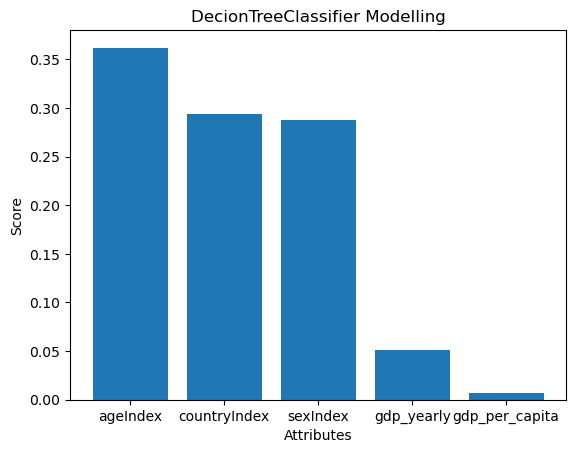

In [72]:
from matplotlib import pyplot

# plot feature importance
pyplot.bar(rfc_result['name'], rfc_result['score'])
pyplot.title("DecionTreeClassifier Modelling")
pyplot.xlabel("Attributes")
pyplot.ylabel("Score")
pyplot.show()

In [73]:
final_df.show(n=1,truncate=False)

+--------------------------------+---------+
|features                        |riskIndex|
+--------------------------------+---------+
|[63.0,1.0,2.1566249E9,796.0,0.0]|2.0      |
+--------------------------------+---------+
only showing top 1 row



In [74]:
final_data = df_5.toPandas()
final_data.head()

,country,year,sex,age,suicides_rate,gdp_yearly,gdp_per_capita,generation,suicides_risk,developed_country
0,Albania,1987,male,15-24 years,6.71,2.156625e+09,796.0,Generation X,medium,undeveloped
1,Albania,1987,male,35-54 years,5.19,2.156625e+09,796.0,Silent,medium,undeveloped
2,Albania,1987,female,15-24 years,4.83,2.156625e+09,796.0,Generation X,low,undeveloped
3,Albania,1987,male,75+ years,4.59,2.156625e+09,796.0,G.I. Generation,low,undeveloped
4,Albania,1987,male,25-34 years,3.28,2.156625e+09,796.0,Boomers,low,undeveloped


<AxesSubplot:xlabel='x label', ylabel='age'>

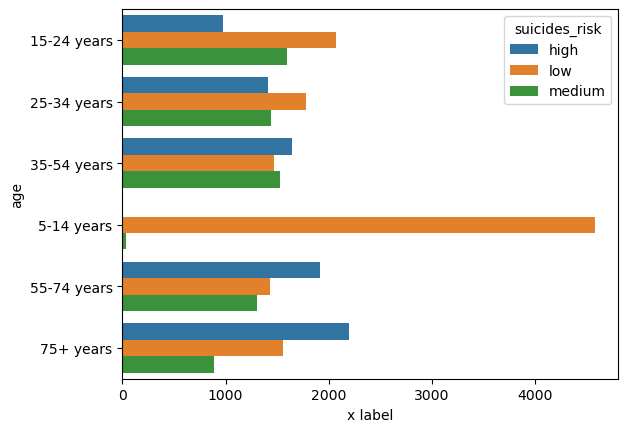

In [75]:
import seaborn as sns
# Pattern 1
df = final_data
first_dimension = "age"
horizontal_label = "x label"
second_dimension = "suicides_risk"
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

<AxesSubplot:xlabel='x label', ylabel='sex'>

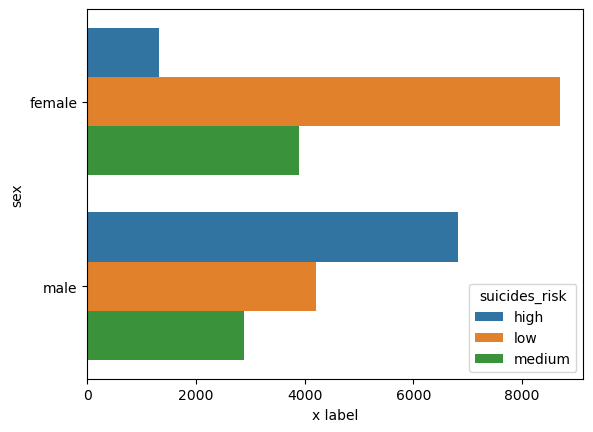

In [76]:
# Pattern 2
df = final_data
first_dimension = "sex"
horizontal_label = "x label"
second_dimension = "suicides_risk"
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

<AxesSubplot:xlabel='x label', ylabel='developed_country'>

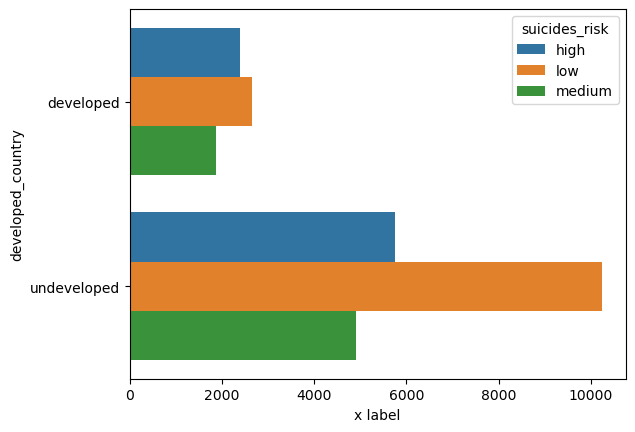

In [77]:
# Pattern 4
df = final_data
first_dimension = "developed_country"
horizontal_label = "x label"
second_dimension = "suicides_risk"
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

<AxesSubplot:xlabel='x label', ylabel='country'>

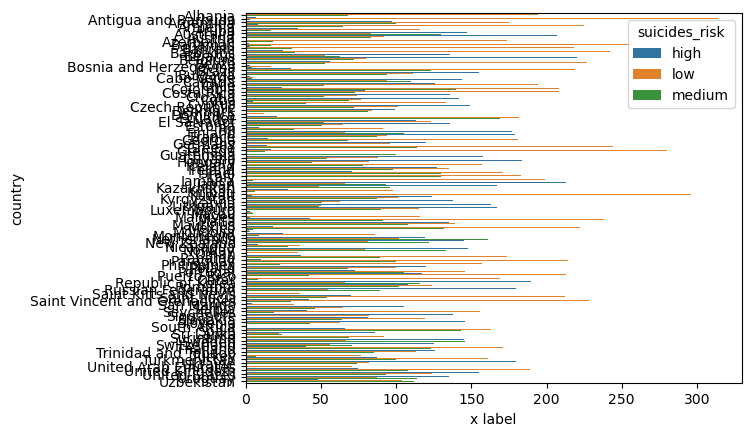

In [78]:
# Pattern 3
df = final_data
first_dimension = "country"
horizontal_label = "x label"
second_dimension = "suicides_risk"
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

In [80]:
# Itertaion 8
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

train_data, test_data = final_df.randomSplit([0.8,0.2])

dtc = DecisionTreeClassifier(featuresCol='features',labelCol='riskIndex', maxBins=120, maxDepth=30,impurity='gini')
# Train the models 
dtc_model = dtc.fit(train_data)

# Transform test data.
dtc_predictions = dtc_model.transform(test_data)

# Evaluate the model using the multi classifer
my_eval = MulticlassClassificationEvaluator(labelCol = 'riskIndex', predictionCol="prediction", metricName="accuracy")

dtc_acc = my_eval.evaluate(dtc_predictions)

# This is the area under the curve. This indicates that the data is highly seperable.
print("Decision Tree Classfier:")
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

Decision Tree Classfier:
A single decision tree has an accuracy of: 86.21%


In [86]:
# Itertaion 8
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

train_data, test_data = final_df.randomSplit([0.8,0.2])

dtc = DecisionTreeClassifier(featuresCol='features',labelCol='riskIndex', maxBins=120, maxDepth=30,impurity='entropy')
# Train the models 
dtc_model = dtc.fit(train_data)

# Transform test data.
dtc_predictions = dtc_model.transform(test_data)

# Evaluate the model using the multi classifer
my_eval = MulticlassClassificationEvaluator(labelCol = 'riskIndex', predictionCol="prediction", metricName="accuracy")

dtc_acc = my_eval.evaluate(dtc_predictions)

# This is the area under the curve. This indicates that the data is highly seperable.
print("Decision Tree Classfier:")
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

Decision Tree Classfier:
A single decision tree has an accuracy of: 86.31%
